In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [4]:
df = pd.read_csv('Chicago_Crime_Detective.csv', index_col = 0)

C:\Users\Apurva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [5]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [12]:
import dateutil

In [14]:
df['Date'] = df['Date'].apply(dateutil.parser.parse, dayfirst=True)

In [15]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [19]:
import math
import numpy as np
median = math.floor(df['Date'].astype('int64').median())
result = np.datetime64(median, "ns")
result

numpy.datetime64('2006-05-24T22:00:00.000000000')

In [20]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [24]:
df['Month'] = df['Date'].dt.month

In [25]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


In [27]:
df.groupby('Month').count()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
Month,,,,,,,,,
1,16325,16325,16325,16325,16325,16325,12213,13649,16325
2,13954,13954,13954,13954,13954,13954,10457,11703,13954
3,15895,15895,15895,15895,15895,15895,12247,13510,15895
4,15086,15086,15086,15086,15086,15086,11618,13092,15086
5,16298,16298,16298,16298,16298,16298,12716,14521,16298
6,15894,15894,15894,15894,15894,15894,12499,14080,15894
7,16733,16733,16733,16733,16733,16733,12960,14699,16733
8,16288,16288,16288,16288,16288,16288,12804,14452,16288
9,16009,16009,16009,16009,16009,16009,12357,13991,16009


In [29]:
df.shape

(191641, 10)

In [33]:
df['WeekDay'] = df['Date'].dt.day_name()

In [34]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Day,WeekDay
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31,Monday


In [38]:
df.groupby('WeekDay').count()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Day
WeekDay,,,,,,,,,,,
Friday,28545,28545,28545,28545,28545,28545,22239,24960,28545,28545,28545
Monday,27372,27372,27372,27372,27372,27372,21292,23878,27372,27372,27372
Saturday,27406,27406,27406,27406,27406,27406,20986,23791,27406,27406,27406
Sunday,26723,26723,26723,26723,26723,26723,20493,23067,26723,26723,26723
Thursday,27067,27067,27067,27067,27067,27067,20967,23587,27067,27067,27067
Tuesday,27141,27141,27141,27141,27141,27141,21217,23770,27141,27141,27141
Wednesday,27387,27387,27387,27387,27387,27387,21395,23985,27387,27387,27387


In [40]:
df.groupby('Month')['Arrest'].sum()

Month
1     1352.0
2     1228.0
3     1295.0
4     1268.0
5     1253.0
6     1248.0
7     1354.0
8     1287.0
9     1247.0
10    1381.0
11    1265.0
12    1358.0
Name: Arrest, dtype: float64

In [42]:
df.groupby(['Year']).groups.keys()

dict_keys([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])

In [46]:
import seaborn as sns

In [48]:
df['Year'].value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
import seaborn as sns

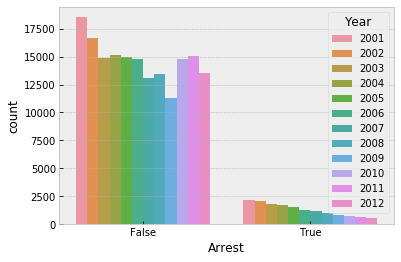

In [54]:
sns.countplot(x = 'Arrest',hue = 'Year', data = df)

In [55]:
df.set_index('Year')

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month,Day,WeekDay
Year,,,,,,,,,,,
2012,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,12,31,Monday
2012,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,12,31,Monday
2012,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,12,31,Monday
2012,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,12,31,Monday
2012,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,12,31,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2001,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,1,1,Monday
2001,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,1,1,Monday
2001,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,1,1,Monday


In [56]:
df.reset_index()

,index,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Day,WeekDay
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31,Monday
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31,Monday
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31,Monday
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31,Monday
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1,1,Monday
191637,191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,1,Monday
191638,191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,1,Monday
191639,191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,1,Monday


In [59]:
yearwisearrest  = df.groupby('Year')['Arrest'].sum()

In [60]:
type(yearwisearrest)

pandas.core.series.Series

In [61]:
yearwisecrime = df.groupby('Year')['Arrest'].count()

In [62]:
yearwisecrime

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: Arrest, dtype: int64

In [68]:
yearwisearrest[2007]/yearwisecrime[2007]

0.08487394957983194

In [66]:
yearwisearrest[2001]

2152.0

In [75]:
df_withoutOther  = df[df['LocationDescription'] !='OTHER']

In [76]:
df_withoutOther.shape

(187068, 12)

In [74]:
df['LocationDescription'].value_counts()

STREET                                         156564
PARKING LOT/GARAGE(NON.RESID.)                  14852
OTHER                                            4573
ALLEY                                            2308
GAS STATION                                      2111
                                                ...  
NEWSSTAND                                           1
JAIL / LOCK-UP FACILITY                             1
APPLIANCE STORE                                     1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA         1
CTA TRAIN                                           1
Name: LocationDescription, Length: 78, dtype: int64

In [77]:
df.shape

(191641, 12)

In [78]:
df_withoutOther.groupby('LocationDescription').bvalue_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [79]:
df_withoutOther['LocationDescription'].value_counts()

STREET                                         156564
PARKING LOT/GARAGE(NON.RESID.)                  14852
ALLEY                                            2308
GAS STATION                                      2111
DRIVEWAY - RESIDENTIAL                           1675
                                                ...  
APPLIANCE STORE                                     1
ANIMAL HOSPITAL                                     1
NEWSSTAND                                           1
JAIL / LOCK-UP FACILITY                             1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA         1
Name: LocationDescription, Length: 77, dtype: int64

In [81]:
locations = ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']
top5 = df[df['LocationDescription'].isin(locations)]
top5.shape

(177510, 12)

In [85]:
top5[top5['LocationDescription']=='GAS STATION'].groupby('WeekDay').count()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Day
WeekDay,,,,,,,,,,,
Friday,316,316,316,316,316,316,239,267,316,316,316
Monday,287,287,287,287,287,287,207,240,287,287,287
Saturday,345,345,345,345,345,345,269,303,345,345,345
Sunday,318,318,318,318,318,318,231,269,318,318,318
Thursday,282,282,282,282,282,282,216,249,282,282,282
Tuesday,269,269,269,269,269,269,200,236,269,269,269
Wednesday,294,294,294,294,294,294,222,252,294,294,294


In [86]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Day,WeekDay
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31,Monday


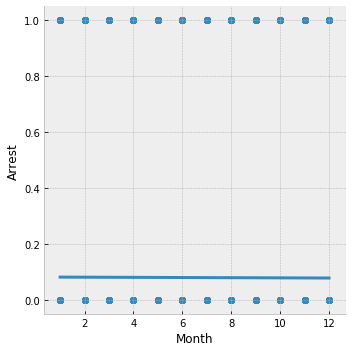